
# Install & Import Library 

In [1]:
!git clone https://github.com/auliaastikaaa/TugasKapsel1

Cloning into 'TugasKapsel1'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 56 (delta 13), reused 13 (delta 2), pack-reused 0
Unpacking objects: 100% (56/56), done.


In [14]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/corpus_sederhana.txt
!wget -P / https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/lib/taudataNlpTm.py
!pip install unidecode textblob sastrawi
!pip install unidecode twython tweepy beautifulsoup4 tika
!pip install spacy python-crfsuite unidecode textblob sastrawi
!python -m spacy download en
!python -m spacy download xx
!python -m spacy download en_core_web_sm

--2021-11-01 21:11:48--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29041 (28K) [text/plain]
Saving to: ‘data/slang.txt’

slang.txt           100%[===================>]  28.36K  --.-KB/s    in 0s      

2021-11-01 21:11:48 (107 MB/s) - ‘data/slang.txt’ saved [29041/29041]

--2021-11-01 21:11:48--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6446 (6.3

In [15]:
import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore')
import tweepy, json, nltk, urllib.request, requests, re
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as bs
from nltk.tokenize import TweetTokenizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('popular')
nltk.download('punkt')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

# Load Data Crawling

Data telah dicrawling dengan keyword 'Antonsen'

In [16]:
def loadTweets(file='Tweets.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T

In [17]:
DT = loadTweets(file='/content/TugasKapsel1/Dataa/tweetskapsel1.json')
DT2 = loadTweets(file='/content/TugasKapsel1/Dataa/tweetskapsell2.json')

In [18]:
data = DT + DT2

In [19]:
df=pd.DataFrame(data)

In [20]:
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,Sat Oct 16 18:48:56 +0000 2021,1449447282697334786,1449447282697334786,RT @ProfesorZubairi: Malam yang hebat untuk ko...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1122504780985712640, 'id_str': '1122504...",None,None,None,None,{'created_at': 'Sat Oct 16 16:04:36 +0000 2021...,False,113,0,False,False,in,NaN,NaN,NaN,NaN,NaN
1,Sat Oct 16 18:48:11 +0000 2021,1449447093567819786,1449447093567819786,RT @darqling: @BadmintonTalk Jojo keren banget...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1292609816972517376, 'id_str': '1292609...",None,None,None,None,{'created_at': 'Sat Oct 16 15:02:10 +0000 2021...,False,424,0,False,False,in,"{'media': [{'id': 1449373346240479233, 'id_str...",False,NaN,NaN,NaN
2,Sat Oct 16 18:47:09 +0000 2021,1449446836276662277,1449446836276662277,"RT @ananditamo: @BadmintonTalk Gws antonsen, g...",False,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1292609816972517376, 'id_str': '1292609...",None,None,None,None,{'created_at': 'Sat Oct 16 15:02:55 +0000 2021...,False,43,0,False,False,in,"{'media': [{'id': 1449390402058870786, 'id_str...",False,NaN,NaN,NaN
3,Sat Oct 16 18:46:40 +0000 2021,1449446712066535426,1449446712066535426,RT @eui__99: @BadmintonTalk Siapa sangka jojo ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1427545346624741381, 'id_str': '1427545...",None,None,None,None,{'created_at': 'Sat Oct 16 14:53:18 +0000 2021...,False,731,0,False,False,in,NaN,NaN,NaN,NaN,NaN
4,Sat Oct 16 18:46:32 +0000 2021,1449446678575017989,1449446678575017989,RT @uchieletto: walaupun antonsen ditonton sm ...,False,"[0, 125]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 919826689663713280, 'id_str': '91982668...",None,None,None,None,{'created_at': 'Sat Oct 16 14:59:58 +0000 2021...,False,12,0,False,False,in,"{'media': [{'id': 1449389372953010182, 'id_str...",False,NaN,NaN,NaN


In [21]:
df.keys()

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'lang', 'extended_entities',
       'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33583 entries, 0 to 33582
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 33583 non-null  object 
 1   id                         33583 non-null  int64  
 2   id_str                     33583 non-null  object 
 3   full_text                  33583 non-null  object 
 4   truncated                  33583 non-null  bool   
 5   display_text_range         33583 non-null  object 
 6   entities                   33583 non-null  object 
 7   metadata                   33583 non-null  object 
 8   source                     33583 non-null  object 
 9   in_reply_to_status_id      4505 non-null   float64
 10  in_reply_to_status_id_str  4505 non-null   object 
 11  in_reply_to_user_id        4512 non-null   float64
 12  in_reply_to_user_id_str    4512 non-null   object 
 13  in_reply_to_screen_name    4512 non-null   obj

In [23]:
df = df[['created_at','full_text','place','retweet_count','favorite_count']]

In [24]:
user = [t['user'] for t in data]

In [25]:
df_user = pd.DataFrame(user)

In [26]:
df_user.keys()

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url',
       'entities', 'protected', 'followers_count', 'friends_count',
       'listed_count', 'created_at', 'favourites_count', 'utc_offset',
       'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang',
       'contributors_enabled', 'is_translator', 'is_translation_enabled',
       'profile_background_color', 'profile_background_image_url',
       'profile_background_image_url_https', 'profile_background_tile',
       'profile_image_url', 'profile_image_url_https', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'has_extended_profile', 'default_profile', 'default_profile_image',
       'following', 'follow_request_sent', 'notifications', 'translator_type',
       'withheld_in_countries', 'profile_banner_url'],
      dtype='object')

In [27]:
df_user = df_user[['id','id_str','name','screen_name',\
                  'location','followers_count','friends_count',\
                   'listed_count', 'favourites_count']]

In [28]:
df2 = pd.concat([df_user, df], axis=1)

In [29]:
df2.head()

,id,id_str,name,screen_name,location,followers_count,friends_count,listed_count,favourites_count,created_at,full_text,place,retweet_count,favorite_count
0,1122504780985712640,1122504780985712640,chicken little,yamayamkecil,🌍,7,62,0,1765,Sat Oct 16 18:48:56 +0000 2021,RT @ProfesorZubairi: Malam yang hebat untuk ko...,None,113,0
1,1292609816972517376,1292609816972517376,zy.,sivpit,,18,97,0,172,Sat Oct 16 18:48:11 +0000 2021,RT @darqling: @BadmintonTalk Jojo keren banget...,None,424,0
2,1292609816972517376,1292609816972517376,zy.,sivpit,,18,97,0,172,Sat Oct 16 18:47:09 +0000 2021,"RT @ananditamo: @BadmintonTalk Gws antonsen, g...",None,43,0
3,1427545346624741381,1427545346624741381,Chikko Fernando_3,chikko_fernando,"Bogor, Jawa Barat",3,25,0,226,Sat Oct 16 18:46:40 +0000 2021,RT @eui__99: @BadmintonTalk Siapa sangka jojo ...,None,731,0
4,919826689663713280,919826689663713280,support TUC Team🇮🇩,__succiduous,Indonesia❤️,3,151,0,18512,Sat Oct 16 18:46:32 +0000 2021,RT @uchieletto: walaupun antonsen ditonton sm ...,None,12,0


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33583 entries, 0 to 33582
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                33583 non-null  int64 
 1   id_str            33583 non-null  object
 2   name              33583 non-null  object
 3   screen_name       33583 non-null  object
 4   location          33583 non-null  object
 5   followers_count   33583 non-null  int64 
 6   friends_count     33583 non-null  int64 
 7   listed_count      33583 non-null  int64 
 8   favourites_count  33583 non-null  int64 
 9   created_at        33583 non-null  object
 10  full_text         33583 non-null  object
 11  place             164 non-null    object
 12  retweet_count     33583 non-null  int64 
 13  favorite_count    33583 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 3.6+ MB


#  Cleaning Text

In [31]:
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    return temp

In [32]:
df2['clean_dasar'] = df2['full_text'].apply(lambda x: clean_tweet(x))
df2.head()

,id,id_str,name,screen_name,location,followers_count,friends_count,listed_count,favourites_count,created_at,full_text,place,retweet_count,favorite_count,clean_dasar
0,1122504780985712640,1122504780985712640,chicken little,yamayamkecil,🌍,7,62,0,1765,Sat Oct 16 18:48:56 +0000 2021,RT @ProfesorZubairi: Malam yang hebat untuk ko...,None,113,0,rt malam yang hebat untuk komunitas badminto...
1,1292609816972517376,1292609816972517376,zy.,sivpit,,18,97,0,172,Sat Oct 16 18:48:11 +0000 2021,RT @darqling: @BadmintonTalk Jojo keren banget...,None,424,0,rt jojo keren banget bangkit teruuss makas...
2,1292609816972517376,1292609816972517376,zy.,sivpit,,18,97,0,172,Sat Oct 16 18:47:09 +0000 2021,"RT @ananditamo: @BadmintonTalk Gws antonsen, g...",None,43,0,rt gws antonsen gua rasa awal mula crampny...
3,1427545346624741381,1427545346624741381,Chikko Fernando_3,chikko_fernando,"Bogor, Jawa Barat",3,25,0,226,Sat Oct 16 18:46:40 +0000 2021,RT @eui__99: @BadmintonTalk Siapa sangka jojo ...,None,731,0,rt siapa sangka jojo yang di match ini ga d...
4,919826689663713280,919826689663713280,support TUC Team🇮🇩,__succiduous,Indonesia❤️,3,151,0,18512,Sat Oct 16 18:46:32 +0000 2021,RT @uchieletto: walaupun antonsen ditonton sm ...,None,12,0,rt walaupun antonsen ditonton sm rt rw aarhu...


In [33]:
Tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)

def tokenization(text):
    teks= Tokenizer.tokenize(text)
    return teks

df2['tokenized'] = df2['clean_dasar'].apply(lambda x: tokenization(x))
df2.head()

,id,id_str,name,screen_name,location,followers_count,friends_count,listed_count,favourites_count,created_at,full_text,place,retweet_count,favorite_count,clean_dasar,tokenized
0,1122504780985712640,1122504780985712640,chicken little,yamayamkecil,🌍,7,62,0,1765,Sat Oct 16 18:48:56 +0000 2021,RT @ProfesorZubairi: Malam yang hebat untuk ko...,None,113,0,rt malam yang hebat untuk komunitas badminto...,"[rt, malam, yang, hebat, untuk, komunitas, bad..."
1,1292609816972517376,1292609816972517376,zy.,sivpit,,18,97,0,172,Sat Oct 16 18:48:11 +0000 2021,RT @darqling: @BadmintonTalk Jojo keren banget...,None,424,0,rt jojo keren banget bangkit teruuss makas...,"[rt, jojo, keren, banget, bangkit, teruuss, ma..."
2,1292609816972517376,1292609816972517376,zy.,sivpit,,18,97,0,172,Sat Oct 16 18:47:09 +0000 2021,"RT @ananditamo: @BadmintonTalk Gws antonsen, g...",None,43,0,rt gws antonsen gua rasa awal mula crampny...,"[rt, gws, antonsen, gua, rasa, awal, mula, cra..."
3,1427545346624741381,1427545346624741381,Chikko Fernando_3,chikko_fernando,"Bogor, Jawa Barat",3,25,0,226,Sat Oct 16 18:46:40 +0000 2021,RT @eui__99: @BadmintonTalk Siapa sangka jojo ...,None,731,0,rt siapa sangka jojo yang di match ini ga d...,"[rt, siapa, sangka, jojo, yang, di, match, ini..."
4,919826689663713280,919826689663713280,support TUC Team🇮🇩,__succiduous,Indonesia❤️,3,151,0,18512,Sat Oct 16 18:46:32 +0000 2021,RT @uchieletto: walaupun antonsen ditonton sm ...,None,12,0,rt walaupun antonsen ditonton sm rt rw aarhu...,"[rt, walaupun, antonsen, ditonton, sm, rt, rw,..."


In [34]:
factory = StopWordRemoverFactory()

Sastrawi_StopWords_id = factory.get_stop_words()

stopword = Sastrawi_StopWords_id + ['rt']

print(stopword)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [35]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df2['stopword_remove'] = df2['tokenized'].apply(lambda x: remove_stopwords(x))
df2.head()

,id,id_str,name,screen_name,location,followers_count,friends_count,listed_count,favourites_count,created_at,full_text,place,retweet_count,favorite_count,clean_dasar,tokenized,stopword_remove
0,1122504780985712640,1122504780985712640,chicken little,yamayamkecil,🌍,7,62,0,1765,Sat Oct 16 18:48:56 +0000 2021,RT @ProfesorZubairi: Malam yang hebat untuk ko...,None,113,0,rt malam yang hebat untuk komunitas badminto...,"[rt, malam, yang, hebat, untuk, komunitas, bad...","[malam, hebat, komunitas, badminton, indonesia..."
1,1292609816972517376,1292609816972517376,zy.,sivpit,,18,97,0,172,Sat Oct 16 18:48:11 +0000 2021,RT @darqling: @BadmintonTalk Jojo keren banget...,None,424,0,rt jojo keren banget bangkit teruuss makas...,"[rt, jojo, keren, banget, bangkit, teruuss, ma...","[jojo, keren, banget, bangkit, teruuss, makasi..."
2,1292609816972517376,1292609816972517376,zy.,sivpit,,18,97,0,172,Sat Oct 16 18:47:09 +0000 2021,"RT @ananditamo: @BadmintonTalk Gws antonsen, g...",None,43,0,rt gws antonsen gua rasa awal mula crampny...,"[rt, gws, antonsen, gua, rasa, awal, mula, cra...","[gws, antonsen, gua, rasa, awal, mula, crampny..."
3,1427545346624741381,1427545346624741381,Chikko Fernando_3,chikko_fernando,"Bogor, Jawa Barat",3,25,0,226,Sat Oct 16 18:46:40 +0000 2021,RT @eui__99: @BadmintonTalk Siapa sangka jojo ...,None,731,0,rt siapa sangka jojo yang di match ini ga d...,"[rt, siapa, sangka, jojo, yang, di, match, ini...","[siapa, sangka, jojo, match, ga, dijagoin, ban..."
4,919826689663713280,919826689663713280,support TUC Team🇮🇩,__succiduous,Indonesia❤️,3,151,0,18512,Sat Oct 16 18:46:32 +0000 2021,RT @uchieletto: walaupun antonsen ditonton sm ...,None,12,0,rt walaupun antonsen ditonton sm rt rw aarhu...,"[rt, walaupun, antonsen, ditonton, sm, rt, rw,...","[walaupun, antonsen, ditonton, sm, rw, aarhus,..."


In [36]:
stemmer = StemmerFactory().create_stemmer()

def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return text

df2['stemmed'] = df2['stopword_remove'].apply(lambda x: stemming(x))
df2.head()

,id,id_str,name,screen_name,location,followers_count,friends_count,listed_count,favourites_count,created_at,full_text,place,retweet_count,favorite_count,clean_dasar,tokenized,stopword_remove,stemmed
0,1122504780985712640,1122504780985712640,chicken little,yamayamkecil,🌍,7,62,0,1765,Sat Oct 16 18:48:56 +0000 2021,RT @ProfesorZubairi: Malam yang hebat untuk ko...,None,113,0,rt malam yang hebat untuk komunitas badminto...,"[rt, malam, yang, hebat, untuk, komunitas, bad...","[malam, hebat, komunitas, badminton, indonesia...","[malam, hebat, komunitas, badminton, indonesia..."
1,1292609816972517376,1292609816972517376,zy.,sivpit,,18,97,0,172,Sat Oct 16 18:48:11 +0000 2021,RT @darqling: @BadmintonTalk Jojo keren banget...,None,424,0,rt jojo keren banget bangkit teruuss makas...,"[rt, jojo, keren, banget, bangkit, teruuss, ma...","[jojo, keren, banget, bangkit, teruuss, makasi...","[jojo, keren, banget, bangkit, teruuss, makasi..."
2,1292609816972517376,1292609816972517376,zy.,sivpit,,18,97,0,172,Sat Oct 16 18:47:09 +0000 2021,"RT @ananditamo: @BadmintonTalk Gws antonsen, g...",None,43,0,rt gws antonsen gua rasa awal mula crampny...,"[rt, gws, antonsen, gua, rasa, awal, mula, cra...","[gws, antonsen, gua, rasa, awal, mula, crampny...","[gws, antonsen, gua, rasa, awal, mula, crampny..."
3,1427545346624741381,1427545346624741381,Chikko Fernando_3,chikko_fernando,"Bogor, Jawa Barat",3,25,0,226,Sat Oct 16 18:46:40 +0000 2021,RT @eui__99: @BadmintonTalk Siapa sangka jojo ...,None,731,0,rt siapa sangka jojo yang di match ini ga d...,"[rt, siapa, sangka, jojo, yang, di, match, ini...","[siapa, sangka, jojo, match, ga, dijagoin, ban...","[siapa, sangka, jojo, match, ga, dijagoin, ban..."
4,919826689663713280,919826689663713280,support TUC Team🇮🇩,__succiduous,Indonesia❤️,3,151,0,18512,Sat Oct 16 18:46:32 +0000 2021,RT @uchieletto: walaupun antonsen ditonton sm ...,None,12,0,rt walaupun antonsen ditonton sm rt rw aarhu...,"[rt, walaupun, antonsen, ditonton, sm, rt, rw,...","[walaupun, antonsen, ditonton, sm, rw, aarhus,...","[walaupun, antonsen, tonton, sm, rw, aarhus, g..."


In [37]:
def cleanning (text):
    text = " ".join(word for word in text)
    return text

df2['clean_text'] = df2['stopword_remove'].apply(lambda x: cleanning(x))
df2.head()

,id,id_str,name,screen_name,location,followers_count,friends_count,listed_count,favourites_count,created_at,full_text,place,retweet_count,favorite_count,clean_dasar,tokenized,stopword_remove,stemmed,clean_text
0,1122504780985712640,1122504780985712640,chicken little,yamayamkecil,🌍,7,62,0,1765,Sat Oct 16 18:48:56 +0000 2021,RT @ProfesorZubairi: Malam yang hebat untuk ko...,None,113,0,rt malam yang hebat untuk komunitas badminto...,"[rt, malam, yang, hebat, untuk, komunitas, bad...","[malam, hebat, komunitas, badminton, indonesia...","[malam, hebat, komunitas, badminton, indonesia...",malam hebat komunitas badminton indonesia jona...
1,1292609816972517376,1292609816972517376,zy.,sivpit,,18,97,0,172,Sat Oct 16 18:48:11 +0000 2021,RT @darqling: @BadmintonTalk Jojo keren banget...,None,424,0,rt jojo keren banget bangkit teruuss makas...,"[rt, jojo, keren, banget, bangkit, teruuss, ma...","[jojo, keren, banget, bangkit, teruuss, makasi...","[jojo, keren, banget, bangkit, teruuss, makasi...",jojo keren banget bangkit teruuss makasih anto...
2,1292609816972517376,1292609816972517376,zy.,sivpit,,18,97,0,172,Sat Oct 16 18:47:09 +0000 2021,"RT @ananditamo: @BadmintonTalk Gws antonsen, g...",None,43,0,rt gws antonsen gua rasa awal mula crampny...,"[rt, gws, antonsen, gua, rasa, awal, mula, cra...","[gws, antonsen, gua, rasa, awal, mula, crampny...","[gws, antonsen, gua, rasa, awal, mula, crampny...",gws antonsen gua rasa awal mula crampnya pas deh
3,1427545346624741381,1427545346624741381,Chikko Fernando_3,chikko_fernando,"Bogor, Jawa Barat",3,25,0,226,Sat Oct 16 18:46:40 +0000 2021,RT @eui__99: @BadmintonTalk Siapa sangka jojo ...,None,731,0,rt siapa sangka jojo yang di match ini ga d...,"[rt, siapa, sangka, jojo, yang, di, match, ini...","[siapa, sangka, jojo, match, ga, dijagoin, ban...","[siapa, sangka, jojo, match, ga, dijagoin, ban...",siapa sangka jojo match ga dijagoin banyak ora...
4,919826689663713280,919826689663713280,support TUC Team🇮🇩,__succiduous,Indonesia❤️,3,151,0,18512,Sat Oct 16 18:46:32 +0000 2021,RT @uchieletto: walaupun antonsen ditonton sm ...,None,12,0,rt walaupun antonsen ditonton sm rt rw aarhu...,"[rt, walaupun, antonsen, ditonton, sm, rt, rw,...","[walaupun, antonsen, ditonton, sm, rw, aarhus,...","[walaupun, antonsen, tonton, sm, rw, aarhus, g...",walaupun antonsen ditonton sm rw aarhus genk k...


In [38]:
final = df2[['clean_text']]

In [39]:
final

,clean_text
0,malam hebat komunitas badminton indonesia jona...
1,jojo keren banget bangkit teruuss makasih anto...
2,gws antonsen gua rasa awal mula crampnya pas deh
3,siapa sangka jojo match ga dijagoin banyak ora...
4,walaupun antonsen ditonton sm rw aarhus genk k...
...,...
33578,pastikan atlet badminton dunia mau tanding sek...
33579,kunlavut vitidsarn french open r32 vs nishimot...
33580,menonton antonsen garuk garuk kepala disini em...
33581,vidio premier sharing 10k bulan sharing anti l...


In [40]:
#final.to_json('DataCleanText.json', index='false')

# EDA DASAR 

In [41]:
print("tweet dari user dengan retweet terbanyak")
d_ = df2.loc[df2['retweet_count'].idxmax()]
d_['clean_text']

tweet dari user dengan retweet terbanyak


'semifinal 2 ina vs den 1 jonatan christie vs anders antonsen 25 23 15 21 21 16 mungkin performa jona'

In [42]:
print("tweet dari user dengan like terbanyak")
l_ = df2.loc[df2['favorite_count'].idxmax()]
l_['clean_text']

tweet dari user dengan like terbanyak


'semifinals ina 1 1 den ms2 jonatan christie vs anders antonsen 25 23 yesss ayo indonesia link ls'

In [43]:
followers = df2.sort_values(by=["followers_count"], ascending=False)
followers.head()

,id,id_str,name,screen_name,location,followers_count,friends_count,listed_count,favourites_count,created_at,full_text,place,retweet_count,favorite_count,clean_dasar,tokenized,stopword_remove,stemmed,clean_text
20527,41730943,41730943,VIVAcoid,VIVAcoid,"Jakarta, Indonesia",4397248,19,5462,380,Sat Oct 16 15:02:33 +0000 2021,"RT @VIVAbola: Duel Menegangkan Piala Thomas, J...",None,11,0,rt duel menegangkan piala thomas jonatan ch...,"[rt, duel, menegangkan, piala, thomas, jonatan...","[duel, menegangkan, piala, thomas, jonatan, ch...","[duel, tegang, piala, thomas, jonatan, christi...",duel menegangkan piala thomas jonatan christie...
5147,41730943,41730943,VIVAcoid,VIVAcoid,"Jakarta, Indonesia",4397233,19,5462,380,Sat Oct 16 15:02:33 +0000 2021,"RT @VIVAbola: Duel Menegangkan Piala Thomas, J...",None,11,0,rt duel menegangkan piala thomas jonatan ch...,"[rt, duel, menegangkan, piala, thomas, jonatan...","[duel, menegangkan, piala, thomas, jonatan, ch...","[duel, tegang, piala, thomas, jonatan, christi...",duel menegangkan piala thomas jonatan christie...
21012,47596019,47596019,Liputan6.com,liputan6dotcom,Jakarta Indonesia,4053768,680,4903,7075,Sat Oct 16 14:59:05 +0000 2021,Hasil Piala Thomas 2021: Jonatan Christie Bung...,None,2,10,hasil piala thomas 2021 jonatan christie bung...,"[hasil, piala, thomas, 2021, jonatan, christie...","[hasil, piala, thomas, 2021, jonatan, christie...","[hasil, piala, thomas, 2021, jonatan, christie...",hasil piala thomas 2021 jonatan christie bungk...
20165,47596019,47596019,Liputan6.com,liputan6dotcom,Jakarta Indonesia,4053768,680,4903,7075,Sat Oct 16 15:05:16 +0000 2021,Indonesia kini unggul 2-1 dari Denmark #Thomas...,None,2,3,indonesia kini unggul 2 1 dari denmark,"[indonesia, kini, unggul, 2, 1, dari, denmark]","[indonesia, kini, unggul, 2, 1, denmark]","[indonesia, kini, unggul, 2, 1, denmark]",indonesia kini unggul 2 1 denmark
16236,47596019,47596019,Liputan6.com,liputan6dotcom,Jakarta Indonesia,4053768,680,4903,7075,Sat Oct 16 16:46:32 +0000 2021,"Hasil Thomas Cup 2021: Menang, Jonatan Christi...",None,1,6,hasil thomas cup 2021 menang jonatan christi...,"[hasil, thomas, cup, 2021, menang, jonatan, ch...","[hasil, thomas, cup, 2021, menang, jonatan, ch...","[hasil, thomas, cup, 2021, menang, jonatan, ch...",hasil thomas cup 2021 menang jonatan christie ...


In [44]:
print('user yang nge-tweet terbanyak')
username = df2.groupby(["name","screen_name"])

u_ = username["name"].count() \
                        .reset_index(name='count') \
                        .sort_values(['count'], \
                        ascending=False)

u_.head(1)

user yang nge-tweet terbanyak


,name,screen_name,count
7125,nca,vnzyrtx,169


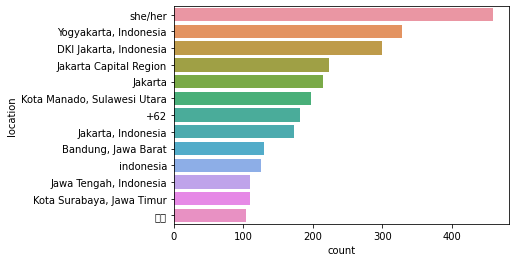

In [45]:
import seaborn as sns, pandas as pd

p = sns.countplot(y=df2.location, order=pd.value_counts(df2.location).iloc[2:15].index)

# Geocode

In [46]:
# Contoh API Keys (Sesuaikan dengan API keys masing-masing)
Ck = 'zjpI6ZxH1wrPnSk1ugPCko63V' # consumer_key
Cs = 'eFXogJ1GbyLcE1fWIXkjM51JXuDyk2zLvQvXauqXqTVNCZAA4r' # consumer_secret
At = '1437538637927751682-7kiCGRwb6Q9CYo6cAqBAsWntAhRqij' # access_token
As = '3UDrpUJ6TITlgZkXB5ybNrTlk1GB8Vpr7KHzvopEJ1ZSL' # access_secret
'Done'

'Done'

In [47]:
def connect(Ck, Cs, At, As):
    auth = tweepy.auth.OAuthHandler(Ck, Cs)
    auth.set_access_token(At, As)
    api = tweepy.API(auth)
    usr_ = api.verify_credentials()
    print('Welcome "{}" you are now connected to twitter server'.format(usr_.name))
    return api

In [48]:
# Koneksi ke twitter
api = connect(Ck, Cs, At, As)

Welcome "Perdiniastika" you are now connected to twitter server


In [49]:
# Mari kita coba #3 gunakan google (map) untuk koordinat suatu lokasi
# http://thoughtfaucet.com/search-twitter-by-location/
# misal search tweet tentang "makanan" di Depok dan sekitarnya

auth = tweepy.auth.OAuthHandler(Ck, Cs)
auth.set_access_token(At, As)
api = tweepy.API(auth)

Geo, N = "-6.326740,106.730042,30km", 5  # HAti-hati jangan ada spasi di Lat-Lon-Radius
qry = 'Antonsen'
for tweet in tweepy.Cursor(api.search, q=qry, count=100, geocode=Geo).items(N):
    print([tweet.created_at, tweet.text.encode('utf-8'), tweet.user.id, tweet.geo])

[datetime.datetime(2021, 11, 1, 12, 9, 52), b'Antonsen lu knp jrg bgt update woi kangen bgt', 271395690, None]
[datetime.datetime(2021, 10, 31, 18, 35, 34), b'@Rakisdianrd Iya. Byk bgt yg komen gini. Dan komen gini :\n\nPas kalah dari Brian : sama pemain antah berantah aja ka\xe2\x80\xa6 https://t.co/TZRL3nO2MI', 504136879, None]
[datetime.datetime(2021, 10, 31, 16, 5, 53), b'Antonsen lg makan sm siapa ya', 271395690, None]
[datetime.datetime(2021, 10, 31, 15, 41, 46), b'Sumpah antonsen gemes \xf0\x9f\x92\x95', 271395690, None]
[datetime.datetime(2021, 10, 31, 14, 35, 8), b'@BadmintonTalk Kanta Tsuneyama bisa jadi next Kento Momota nih.\nWelcome new champion!\nStill 25 y.o!\nSemakin seru pe\xe2\x80\xa6 https://t.co/b2Rq2H51Ku', 2320875572, None]


#Voyant

In [50]:
from PIL import Image

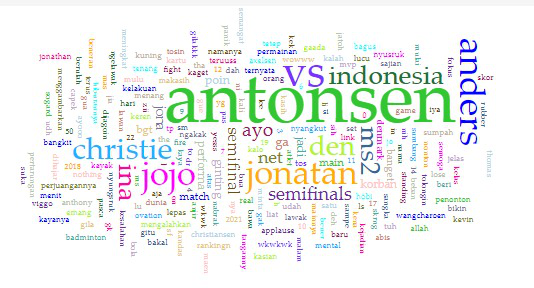

In [51]:
wordcloud = Image.open('/content/TugasKapsel1/Hasilvoyant/Wordcloud.jpeg')
wordcloud

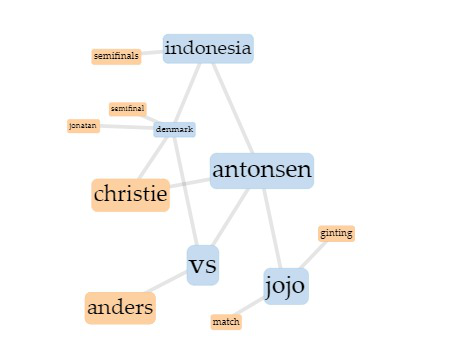

In [52]:
link = Image.open('/content/TugasKapsel1/Hasilvoyant/Link.jpeg')
link

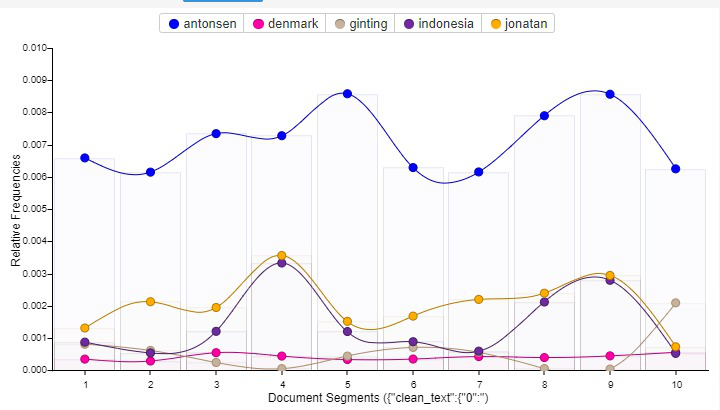

In [53]:
trend = Image.open('/content/TugasKapsel1/Hasilvoyant/Trend.jpeg')
trend

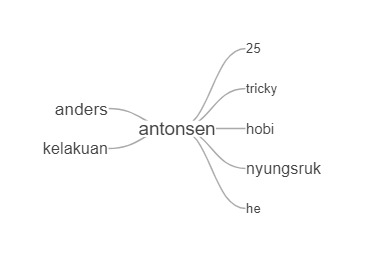

In [54]:
wordtree = Image.open('/content/TugasKapsel1/Hasilvoyant/Wordtree.jpeg')
wordtree

**Interpretasi**


*   Pada gambar WordCloud terlihat bahwa kata "antonsen" paling banyak di tweet karena memang kata kunci analisa ini adalah 'antonsen'. Selanjutnya terdapat kata 'jojo','jonatan','christie', 'vs', 'Andres', 'indonesia', dan 'semifinal' yang paling banyak di tweet setelah kata 'antonsen'. Hal tersebut dikarenakan pada saat itu sedang ada pertandingan badminton, indonesia yang diwakili oleh Jonatan Christie VS Andres Antonsen

*   Pada gambar Link, dapat dilihat bahwa pada semifinal antara Indonesia(Jojo) vs Denmark(Antonsen)

*   Dari data yang didapat pada gambar trend, menunjukkan jonatan memiliki korelasi yang sama dengan indonesia. Hal tersebut mengartikan bahwa jonatan merupakan wakil dari indonesia pada pertandingan badminton.

*   Dari data yang didapat pada gambar wordtree, menunjukkan bahwa kelakuan anders antonsen saat bertanding tricky dan hobi nyungsruk


